# Performing Exploratory Data Analysis for Student Retention

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Prep plotting aesthetics
# Set font size names
SMALL_SIZE = 14
MEDIUM_SIZE = 16
# Set font sizes
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
# Set figure size
plt.rcParams["figure.figsize"] = (14, 8) # size of the figure plotted

## Loading in Data

In [2]:
# Load in cleaned data
data = pd.read_csv("data/Most-Recent-Cohorts-Institution-filtered.csv")

data.head()

,Unnamed: 0,UNITID,INSTNM,CITY,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,...,MD_FAMINC,FAMINC_IND,MN_EARN_WNE_P10,UGDS_MEN,UGDS_WOMEN,GRADS,RET_FT4_POOLED,RET_FTL4_POOLED,PRGMOFR,ADMCON7
0,0,100654,Alabama A & M University,Normal,4,1,1,5,12.0,NaN,...,23553,10340.346032,35500,0.3978,0.6022,884.0,0.5533,NaN,NaN,1.0
1,1,100663,University of Alabama at Birmingham,Birmingham,4,1,1,5,12.0,NaN,...,34489,30607.18029,48400,0.3816,0.6184,8685.0,0.8477,NaN,NaN,1.0
2,2,100690,Amridge University,Montgomery,4,2,1,5,12.0,NaN,...,15033.5,20596.158491,47600,0.2886,0.7114,477.0,0.5000,NaN,NaN,NaN
3,3,100706,University of Alabama in Huntsville,Huntsville,4,1,1,5,12.0,NaN,...,44787,27941.821963,52000,0.5891,0.4109,1972.0,0.8234,NaN,NaN,1.0
4,4,100724,Alabama State University,Montgomery,4,1,1,5,12.0,NaN,...,22080.5,8551.802974,30600,0.3605,0.6395,458.0,0.6164,NaN,NaN,1.0


Since we are focusing on retention rates, we are renaming the variable names for the "First-time, full-time student retention rate at four-year institutions" and "First-time, full-time student retention rate at less-than-four-year institutions" in order to improve identification of the main variables.

In [3]:
# First-time, full-time student retention rate at four-year institutions
four_yr_retention = data.RET_FT4

# First-time, full-time student retention rate at less-than-four-year institutions
less_four_yr_retention = data.RET_FTL4

## Histograms for Retention Rates

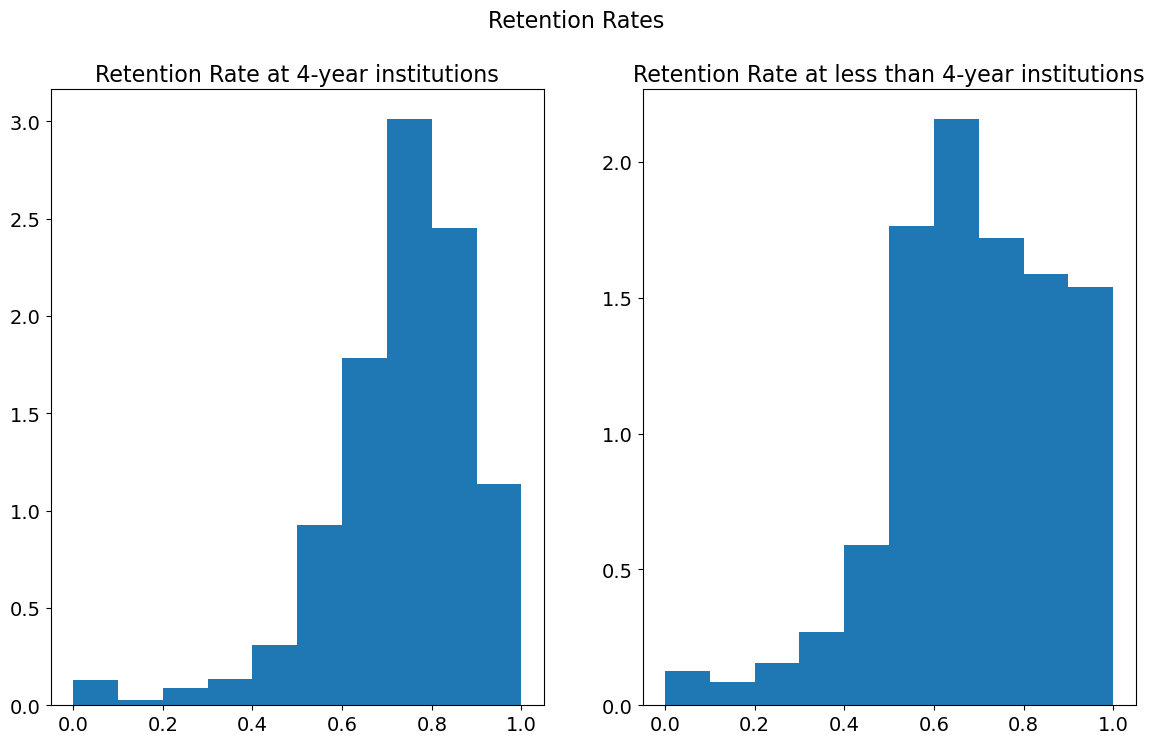

<Figure size 1400x800 with 0 Axes>

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Retention Rates')

ax1.set_title('Retention Rate at 4-year institutions')
ax1.hist(four_yr_retention, density = True)

ax2.set_title('Retention Rate at less than 4-year institutions')
ax2.hist(less_four_yr_retention, density = True)

plt.show()
plt.savefig('figures/figure_1.png')

Based on the histograms, we notice that retention rates for both 4-year and less than 4-year institutions appear to have a left-skewed distribution. However, less than 4-year institutions has more density contained within the higher retention rates compared to the 4-year institutions.

## How does the control of the school affect retention rates?

#### Public Schools

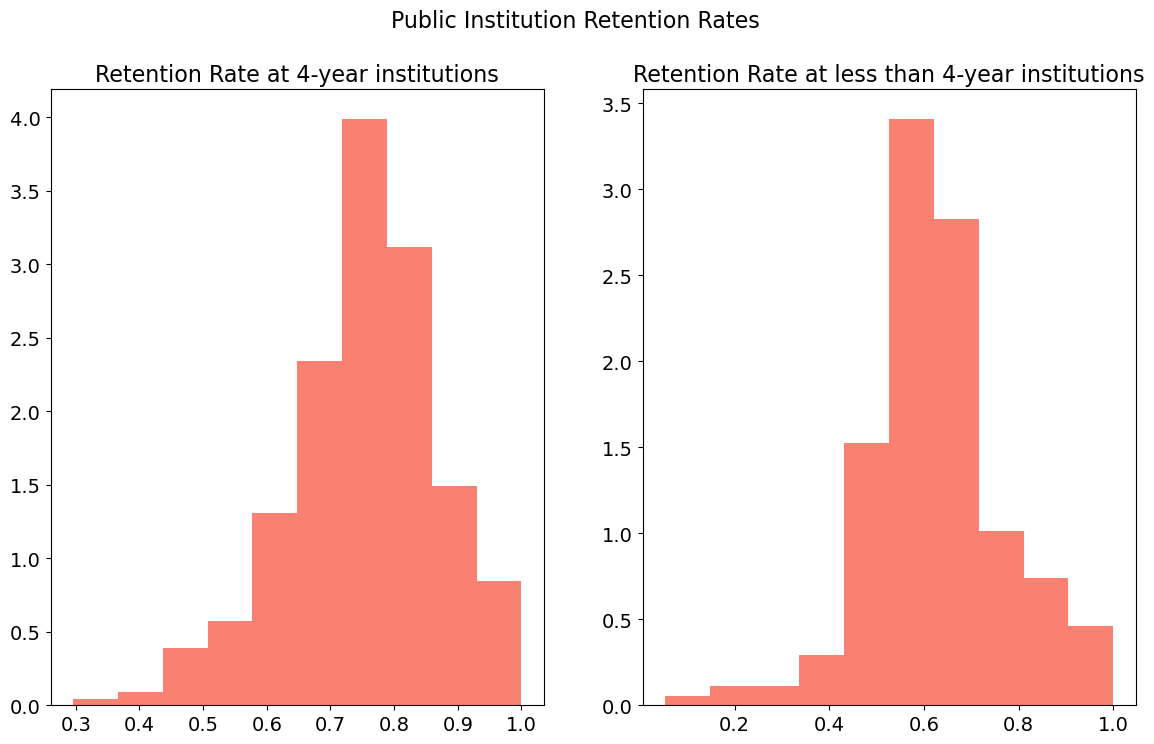

In [5]:
public = data.loc[data["CONTROL"] == 1]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Public Institution Retention Rates')

ax1.set_title('Retention Rate at 4-year institutions')
ax1.hist(public.RET_FT4, density = True, color = "salmon")

ax2.set_title('Retention Rate at less than 4-year institutions')
ax2.hist(public.RET_FTL4, density = True, color = "salmon")

plt.show()

For public schools, the retention rates severely declines as the left-skewed distribution transforms into a normal distribution. The change is more noticeable in the retention rates of less than 4-year public institutions.

#### Private Non-Profit

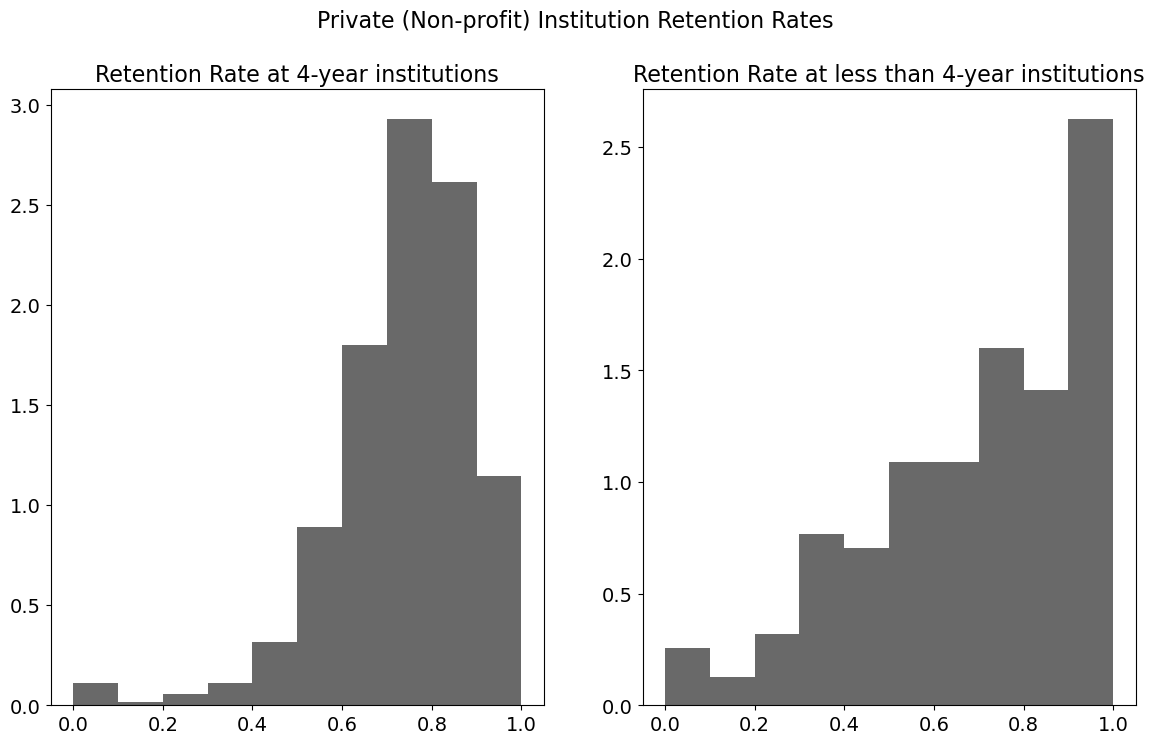

In [6]:
private_non_profit = data.loc[data["CONTROL"] == 2]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Private (Non-profit) Institution Retention Rates')

ax1.set_title('Retention Rate at 4-year institutions')
ax1.hist(private_non_profit.RET_FT4, density = True, color = "dimgray")

ax2.set_title('Retention Rate at less than 4-year institutions')
ax2.hist(private_non_profit.RET_FTL4, density = True, color = "dimgray")

plt.show()

In the case of non-profit private institutions, the retention rates for 4-year institutions appears to remain with the same. However, the retention for less than 4-year institution increases with the density focused in the 100% retention rate. 

#### Private For-Profit

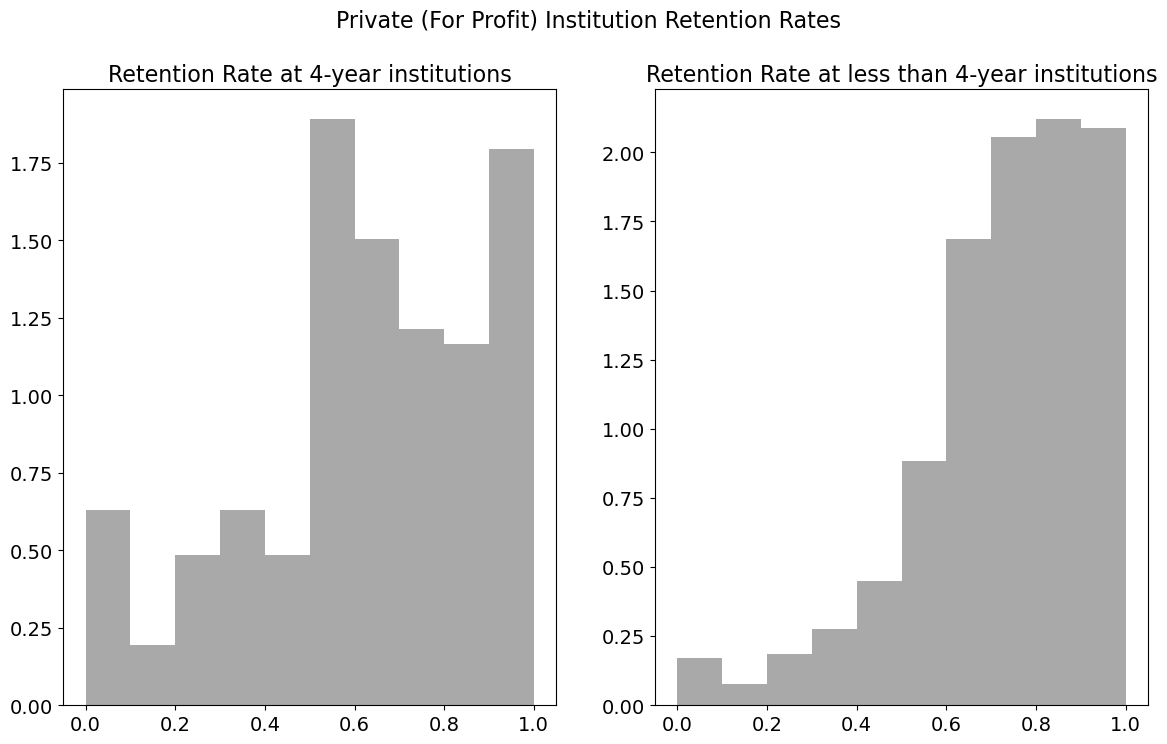

In [7]:
private_profit = data.loc[data["CONTROL"] == 3]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Private (For Profit) Institution Retention Rates')

ax1.set_title('Retention Rate at 4-year institutions')
ax1.hist(private_profit.RET_FT4, density = True, color = "darkgray")

ax2.set_title('Retention Rate at less than 4-year institutions')
ax2.hist(private_profit.RET_FTL4, density = True, color = "darkgray")

plt.show()

As for-profit private institutions, the retention rate for 4-year institutions maintains a left skewed distribution. However, a spike appears around the the 50% mark which indicates a slightly worse retention than the overall. As for the less than 4-year institution, the retention increases similarly to the non-profit institution as the density is focused on the higher end of the retention rates.

### Does Admission Rates affect Retention Rates?

In [27]:
def filtered_df_two_columns(df, col1, col2):
    """
    Input: the dataframe and 2 variable column names
    Output: returns a new DataFrame that only contains values in both columns (no NA)
    """
    # Check that the input DataFrame contains both column names
    if col1 not in df.columns or col2 not in df.columns:
        raise ValueError("Input DataFrame does not contain both specified column names")

    # Select only the specified columns
    selected_cols = [col1, col2]
    new_df = df[selected_cols]

    # Use pandas' built-in methods to check which cells have numbers
    is_numeric = pd.to_numeric(new_df.iloc[:, 0], errors="coerce").notnull() & pd.to_numeric(new_df.iloc[:, 1], errors="coerce").notnull()

    # Filter the DataFrame to keep only the rows with numbers in both columns
    filtered_df = new_df.loc[is_numeric]

    return filtered_df

In [29]:
# Creating filtered data for 4-year institutions
filtered_adm_rate_and_four_year = filtered_df_two_columns(data, 'ADM_RATE', 'RET_FT4')

# Creating filtered data for less than 4-year institutions
filtered_adm_rate_and_less_four_year = filtered_df_two_columns(data, 'ADM_RATE', 'RET_FTL4')

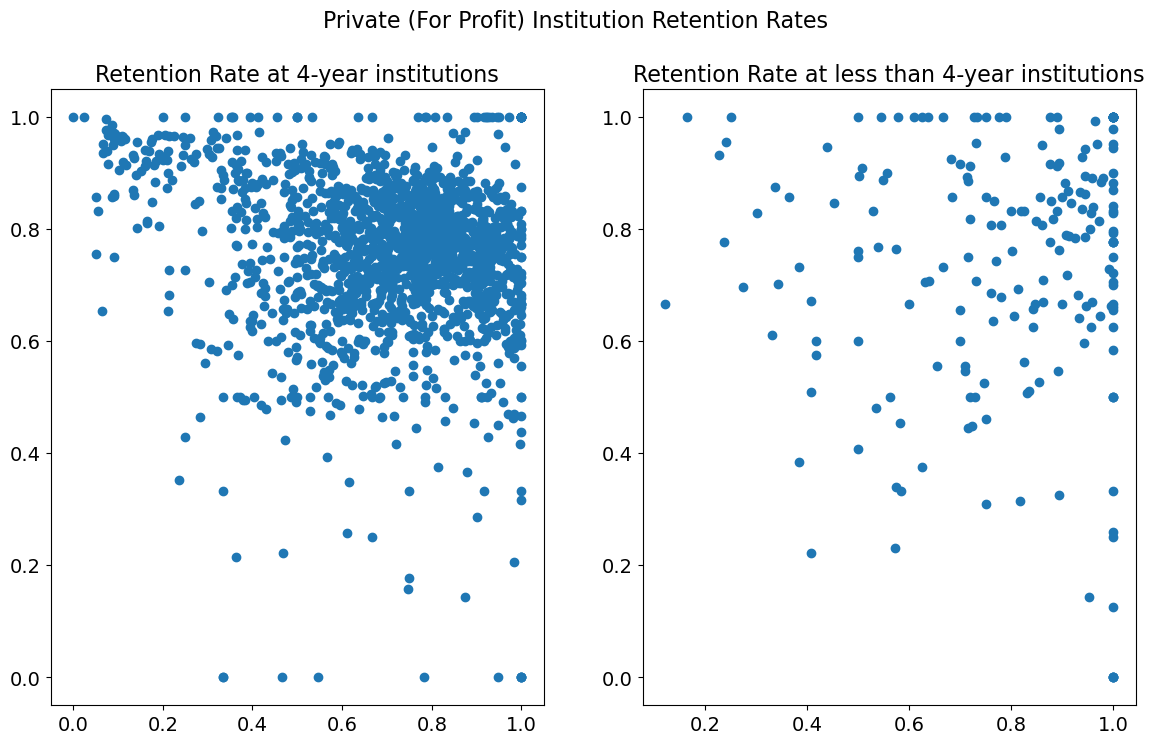

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Private (For Profit) Institution Retention Rates')

ax1.set_title('Retention Rate at 4-year institutions')
ax1.scatter(filtered_adm_rate_and_four_year.ADM_RATE, filtered_adm_rate_and_four_year.RET_FT4)

ax2.set_title('Retention Rate at less than 4-year institutions')
ax2.scatter(filtered_adm_rate_and_less_four_year.ADM_RATE, filtered_adm_rate_and_less_four_year.RET_FTL4)

plt.show()

In [31]:
# Pearson correlation coefficient 
def pearson_corr_coef(x, y):
    """
    Input: two lists of equal length
    Output: returns an array with the Pearson correlation coefficient
    """
    # Checking if the values in the list are the same
    if len(x) !=  len(y):
        raise ValueError("Input lists must have the same length")

    # Find Covariance
    covariance = np.cov(x, y)

    # Standard deviation of x and y
    stdx = np.std(x)
    stdy = np.std(y)

    # Returning Correlation coefficient
    return covariance / (stdx * stdy)

In [33]:
# 4-year
pearson_corr_coef(filtered_adm_rate_and_four_year.ADM_RATE, filtered_adm_rate_and_four_year.RET_FT4)

array([[ 1.50186678, -0.16826222],
       [-0.16826222,  0.66662623]])

In [34]:
# less than 4-year
pearson_corr_coef(filtered_adm_rate_and_less_four_year.ADM_RATE, filtered_adm_rate_and_less_four_year.RET_FTL4)

array([[ 0.9656183 , -0.01185325],
       [-0.01185325,  1.04609297]])

In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def prediction_analysis(filtered_data):
    """
    Input: Filtered Dataframe that only has two columns
    Performs a simple linear regression analysis on the input data and generates 
    predictions based on the input variables.
    """
    # Check that the input DataFrame contains only two columns
    if len(filtered_data.columns) < 2:
        raise ValueError("Input DataFrame contains less than 2 columns (Must only include 2)")
    if len(filtered_data.columns) > 2:
        raise ValueError("Input DataFrame contains more than 2 columns (Must only include 2)")

    # Fit a simple linear regression model to the input data
    model = LinearRegression()
    X = filtered_data.iloc[:, 0].values.reshape(-1, 1)
    y = filtered_data.iloc[:, 1].values.reshape(-1, 1)
    model.fit(X, y)

    # Generate predictions for the output column based on the input variables
    pred_col = model.predict(X)

    return pred_col

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def regression_analysis_results(x_col, y_col, pred_col):
    """
    Input: Columns containing the x values, actual values, and predicted values
    Performs a regression analysis to determine how well the model predicts the actual values.
    Calculates and returns the R-squared value and generates a scatter plot of the predicted values 
    versus the actual values.
    """
    # Check that the input DataFrame contains both columns
    if len(y_col) != len(pred_col):
        raise ValueError("Input columns are not the same length")

    # Calculate the R-squared value
    r_squared = r2_score(y_col, pred_col)

    # Generate a scatter plot of the predicted values versus the actual values
    plt.scatter(y_col, pred_col)
    plt.plot(x_col, pred_col, color = 'red', linewidth = 2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Regression Analysis Results')
    plt.show()

    return r_squared

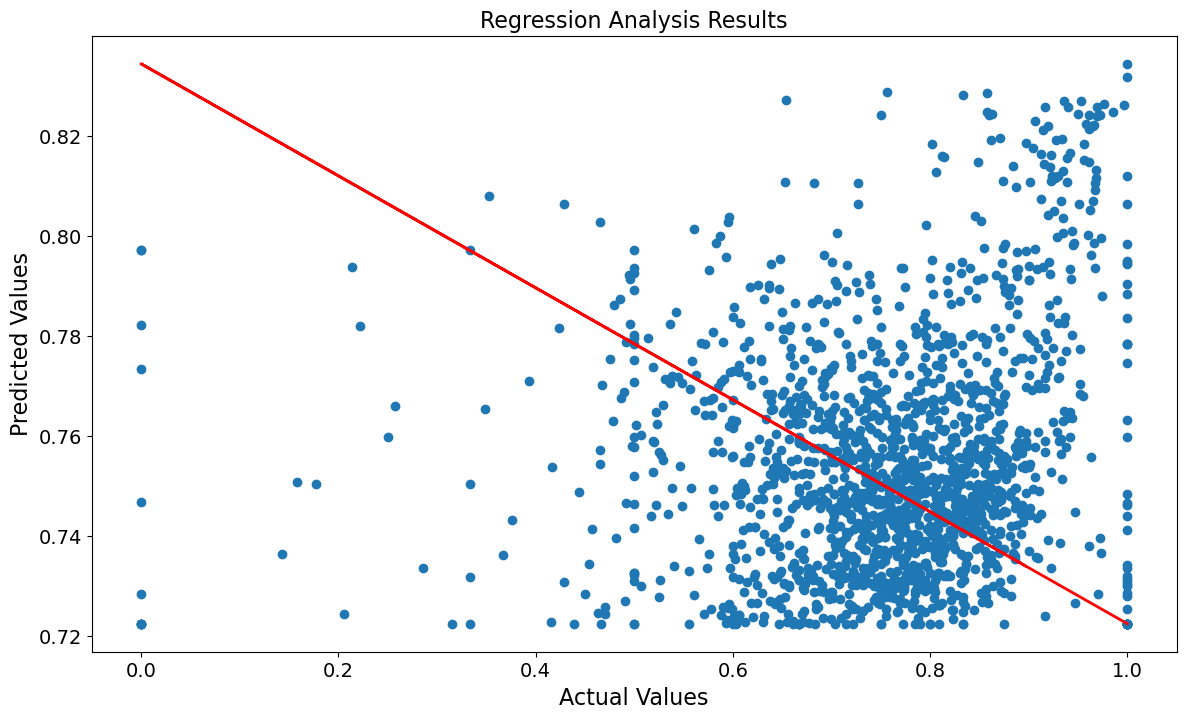

0.028278697918843854

In [54]:
# Retention Rate Predictions based on Four-Years
admission_prediction_four = prediction_analysis(filtered_adm_rate_and_four_year)
regression_analysis_results(filtered_adm_rate_and_four_year.ADM_RATE, filtered_adm_rate_and_four_year.RET_FT4, admission_prediction_four)

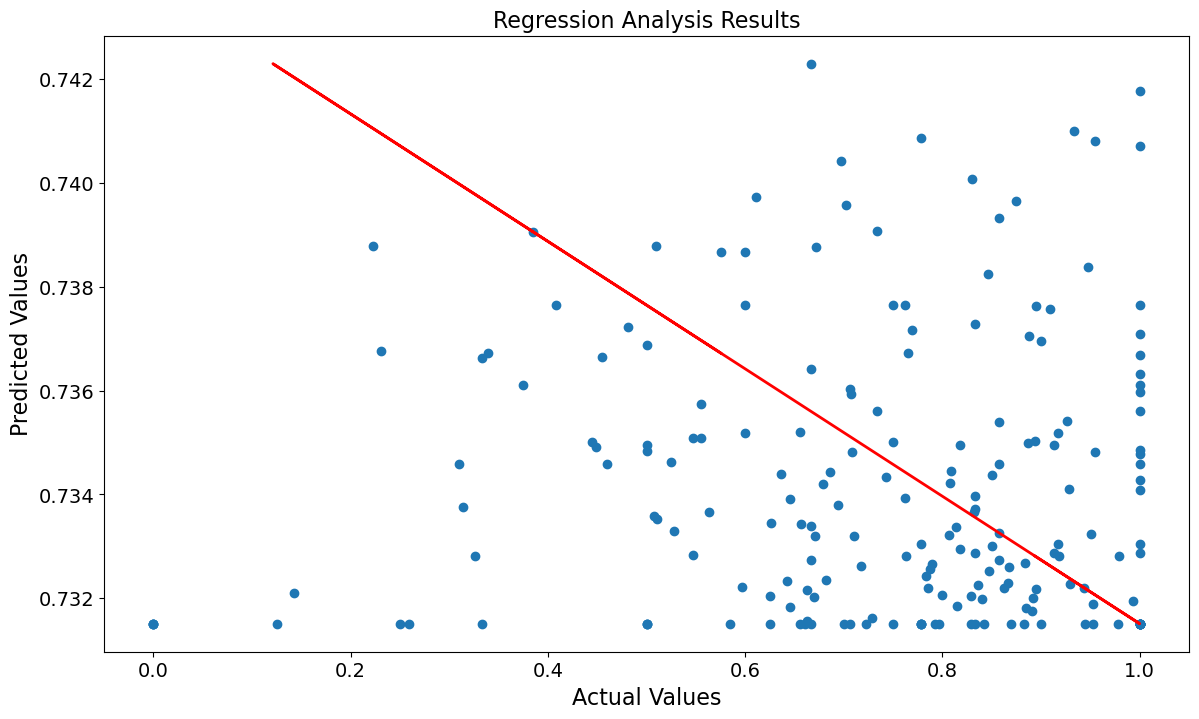

0.00013909112717636063

In [55]:
# Retention Rate Predictions based on Less-than-four-years
admission_prediction_less_four = prediction_analysis(filtered_adm_rate_and_less_four_year)
regression_analysis_results(filtered_adm_rate_and_less_four_year.ADM_RATE, filtered_adm_rate_and_less_four_year.RET_FTL4, admission_prediction_less_four)

In [93]:
from sklearn.ensemble import ExtraTreesRegressor
import pandas as pd

def compute_feature_importance(df, target_column, feature_columns):
    """
    Computes the feature importances of multiple variables using scikit-learn's ExtraTreesRegressor

    Input:
    df (pandas.DataFrame): The data containing the target and feature columns.
    target_column (str): The name of the target column.
    feature_columns (list): A list of names of the feature columns whose importances are to be computed.

    Output:
    pandas.Series: The feature importances of the variables.
    """
    # Split the data into target and feature columns
    X = df.drop([target_column], axis=1)
    y = df[target_column]

    # Fit the ExtraTreesRegressor model
    etr = ExtraTreesRegressor(n_estimators=100, random_state=0)
    etr.fit(X, y)

    # Compute the feature importances
    feature_importances = pd.Series(etr.feature_importances_, index=X.columns)
    variable_importances = feature_importances[feature_columns]

    return variable_importances

In [94]:
features = ['ADM_RATE', 'UGDS_WHITE', 'UGDS_BLACK',
            'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN' , 'UGDS_NHPI',
            'UGDS_2MOR', 'UGDS_NRA','UGDS_UNKN', 'TUITIONFEE_IN', 'TUITIONFEE_OUT',
            'RET_FT4', 'PCTFLOAN', 'UGDS_MEN', 'UGDS_WOMEN']

clean_data = data[features].dropna()

compute_feature_importance(clean_data, "RET_FT4", features)

KeyError: "['RET_FT4'] not in index"

In [92]:
clean_data

,ADM_RATE,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,TUITIONFEE_IN,TUITIONFEE_OUT,RET_FT4,PCTFLOAN,UGDS_MEN,UGDS_WOMEN
0,0.8965,0.0159,0.9022,0.0116,0.0012,0.0028,0.0008,0.0143,0.0073,0.0440,10024.0,18634.0,0.5403,0.7504,0.3978,0.6022
1,0.8060,0.5496,0.2401,0.0610,0.0704,0.0024,0.0004,0.0469,0.0232,0.0059,8568.0,20400.0,0.8640,0.4688,0.3816,0.6184
3,0.7711,0.7173,0.0907,0.0599,0.0354,0.0083,0.0010,0.0431,0.0190,0.0252,11338.0,23734.0,0.8180,0.3855,0.5891,0.4109
4,0.9888,0.0167,0.9265,0.0130,0.0019,0.0017,0.0017,0.0119,0.0155,0.0111,11068.0,19396.0,0.6202,0.7805,0.3605,0.6395
5,0.8039,0.7695,0.1024,0.0512,0.0131,0.0033,0.0008,0.0359,0.0187,0.0051,11620.0,31090.0,0.8723,0.3644,0.4417,0.5583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6032,0.7826,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6200.0,6200.0,0.0000,0.6868,0.1598,0.8402
6045,0.8000,0.6787,0.0609,0.1690,0.0139,0.0194,0.0000,0.0360,0.0111,0.0111,5556.0,5556.0,0.7759,0.2201,0.4127,0.5873
6066,0.5000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9600.0,9600.0,0.7143,0.0000,1.0000,0.0000
6105,0.7827,0.6513,0.0588,0.0815,0.0674,0.0014,0.0009,0.0357,0.0846,0.0183,18450.0,35514.0,0.8691,0.4654,0.5367,0.4633
